## BY- ayush kumar mishra

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
x_train,x_test,y_train,y_test= train_test_split(df.drop(columns=['strength']),df.iloc[:,-1],test_size=0.2,random_state=42)
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred= lr.predict(x_test)

In [9]:
r2_score(y_test,y_pred)

0.6081118525118778

In [10]:
import numpy as np
lr = LinearRegression()
np.mean(cross_val_score(lr,df.drop(columns=['strength']),df.iloc[:,-1],scoring='r2'))

0.6012883381757208

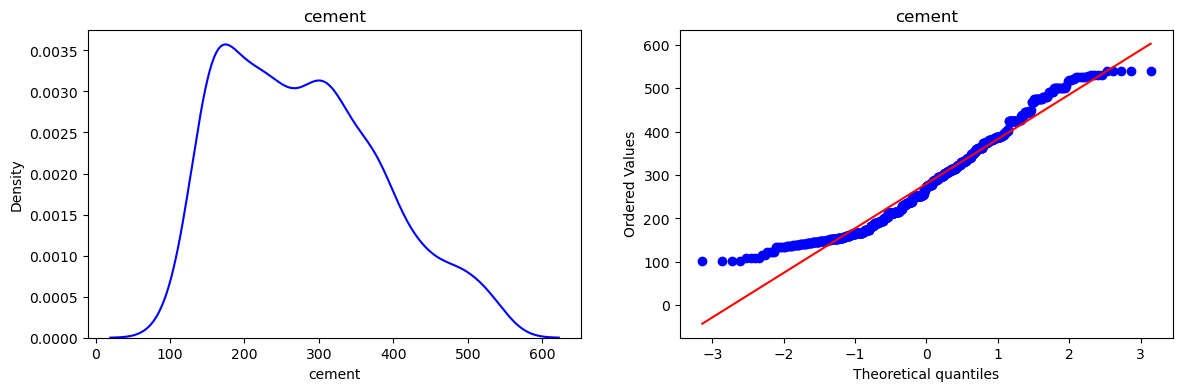

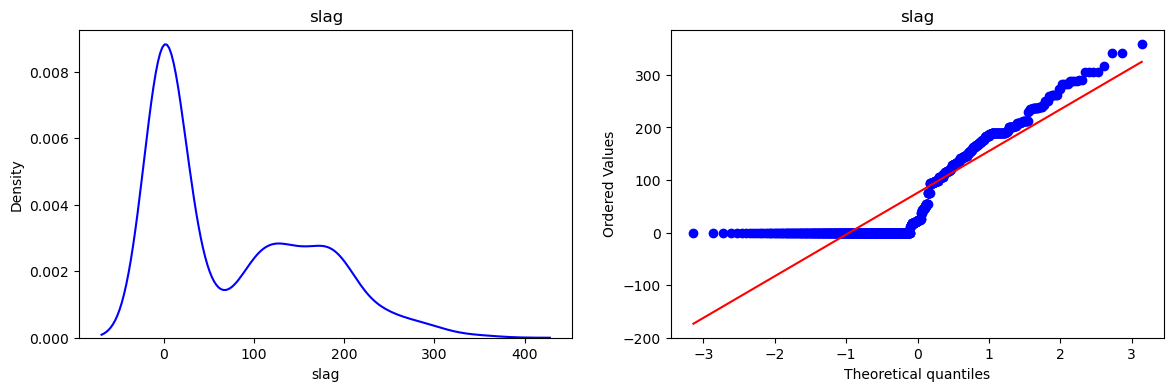

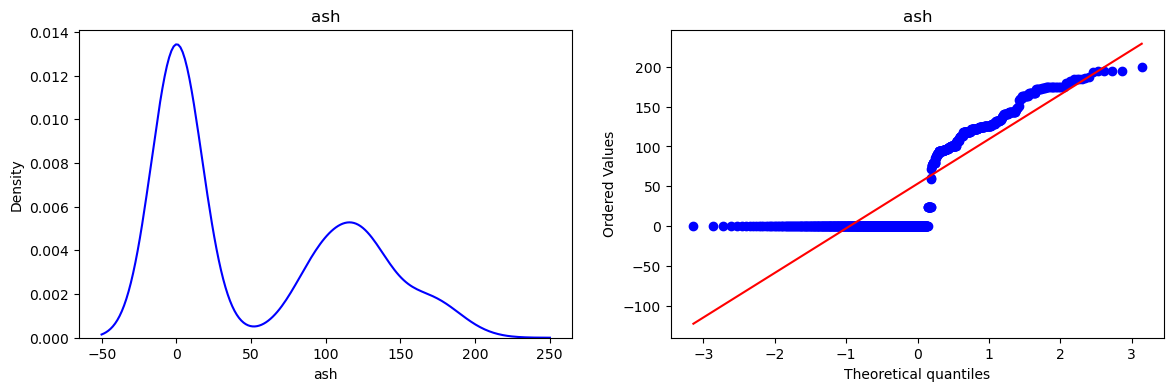

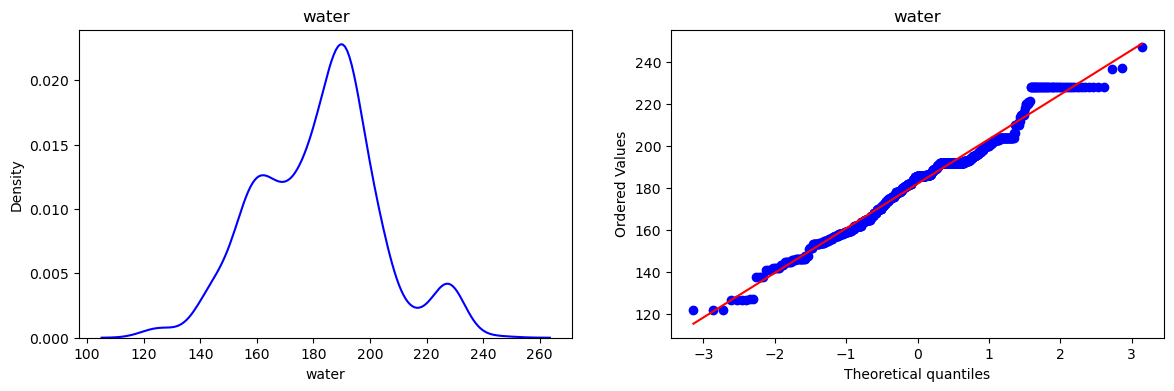

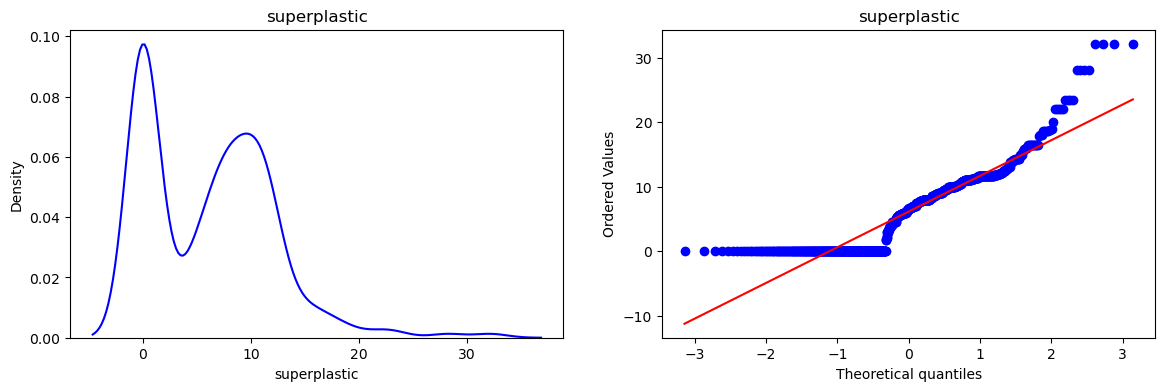

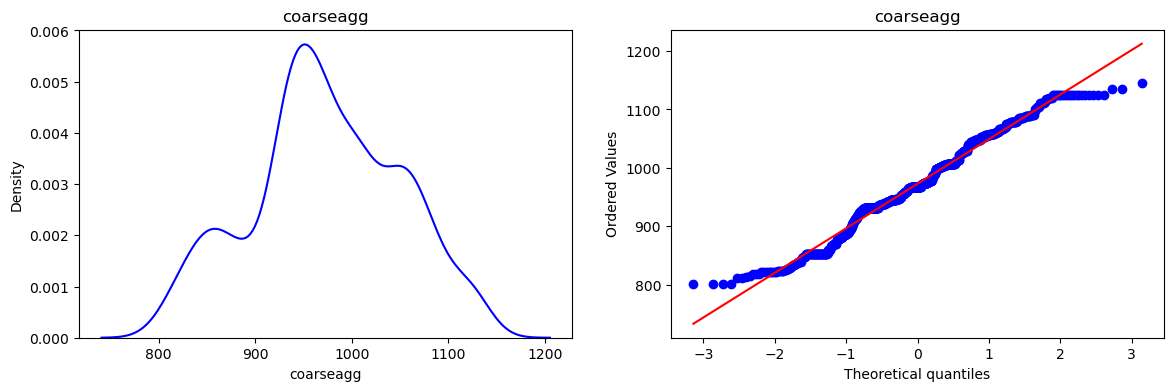

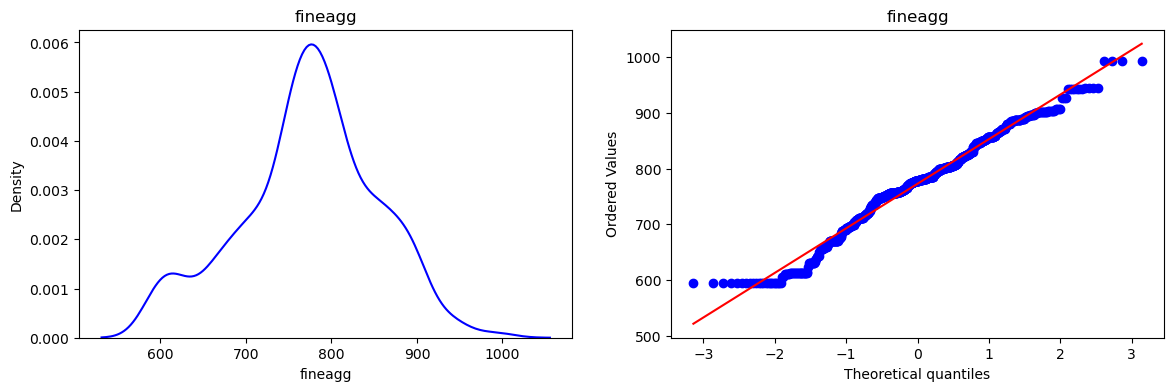

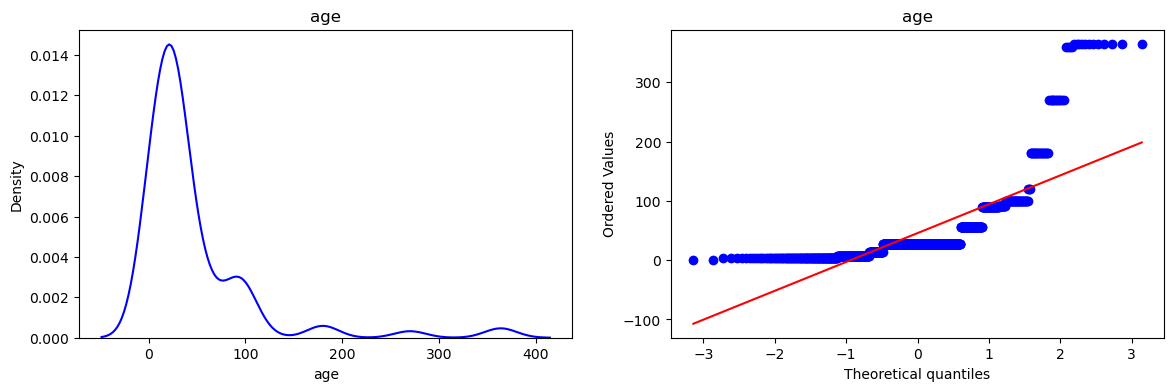

In [11]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col], color='blue')
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()   

In [12]:
# Yeo-johnson transformer

In [13]:
pt= PowerTransformer()
xt_train= pt.fit_transform(x_train)
xt_test= pt.transform(x_test)
lr= LinearRegression()
lr.fit(xt_train,y_train)
yt_pred= lr.predict(xt_test)
print(r2_score(y_test,yt_pred))
pd.DataFrame({'cols':x_train.columns,'lambda-values':pt.lambdas_})

0.7834235373708996


,cols,lambda-values
0,cement,0.174823
1,slag,0.018590
2,ash,-0.156230
3,water,0.852831
4,superplastic,0.257780
5,coarseagg,1.229730
6,fineagg,1.725780
7,age,0.002863


In [14]:
# checking by cross-validation
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(df.drop(columns=['strength']))

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,df.iloc[:,-1],scoring='r2'))


0.7989126800473404

In [15]:
xt_train=pd.DataFrame(xt_train,columns=x_train.columns)

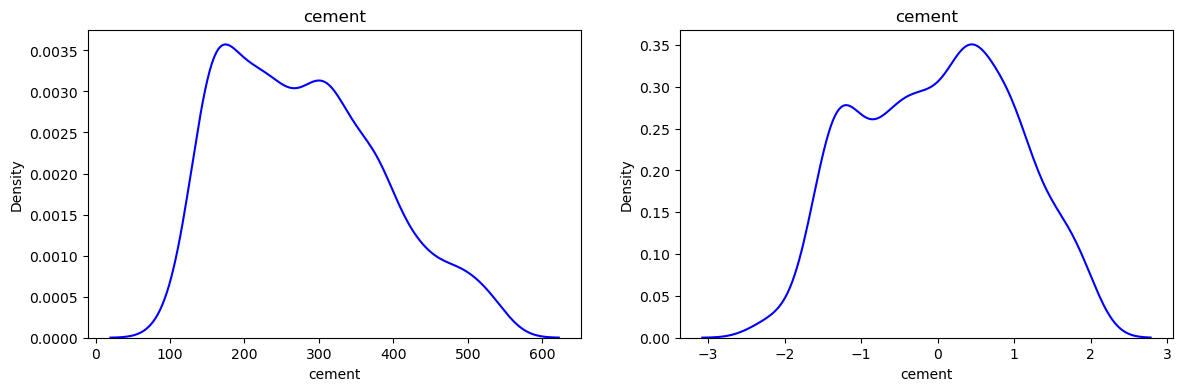

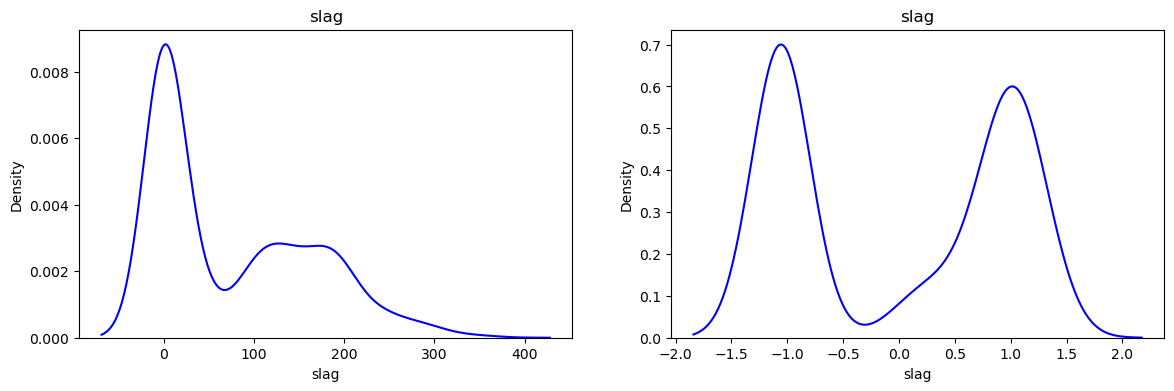

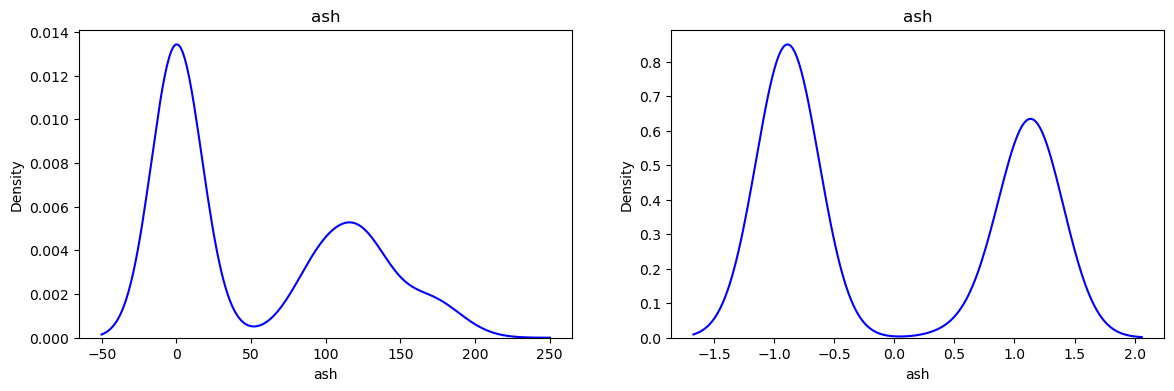

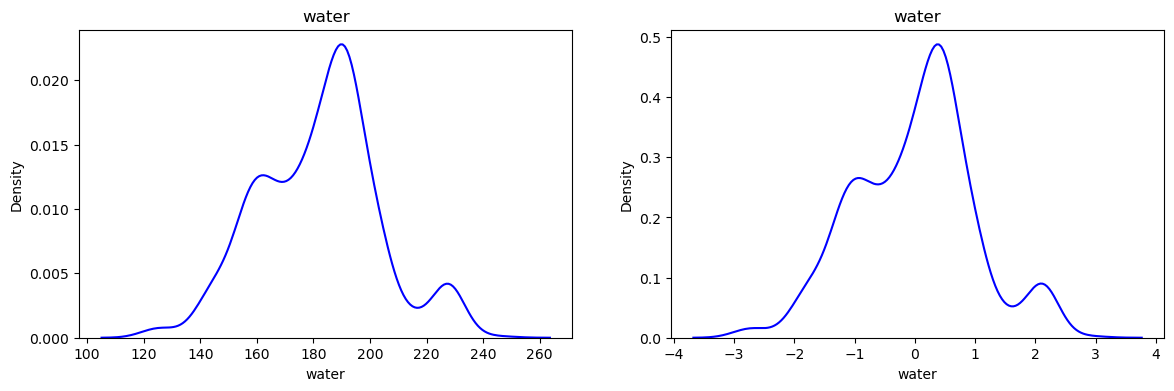

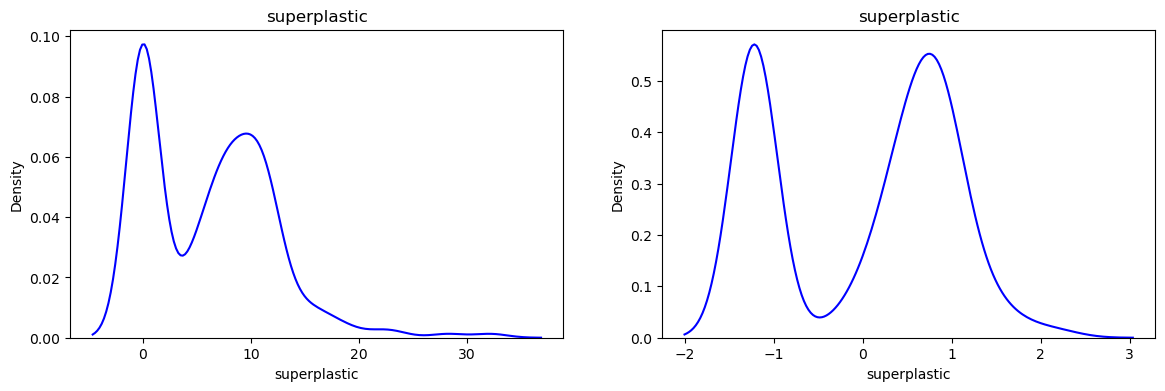

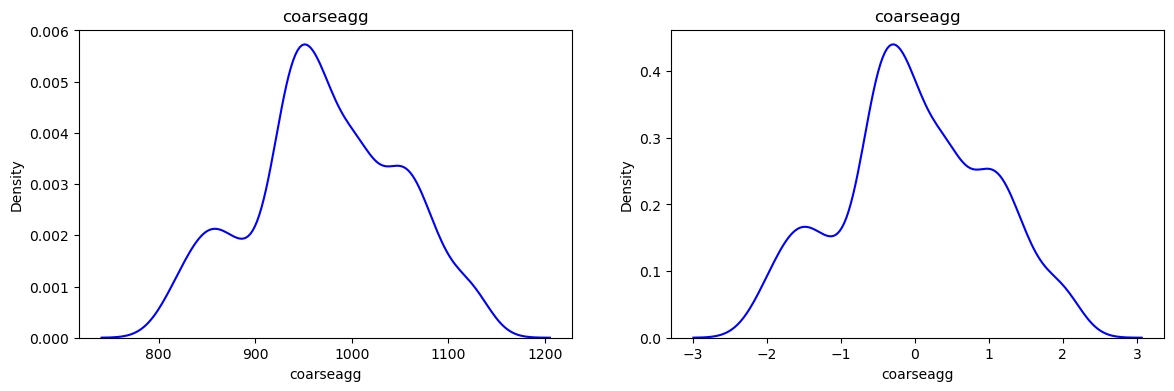

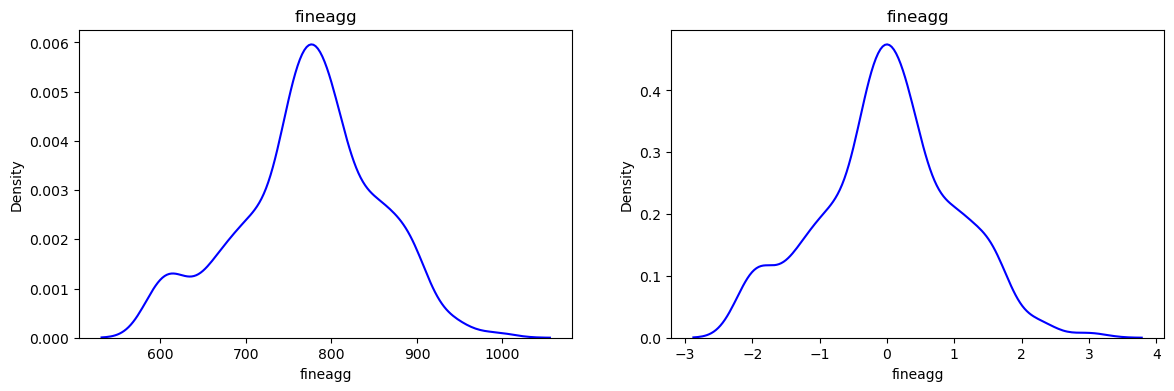

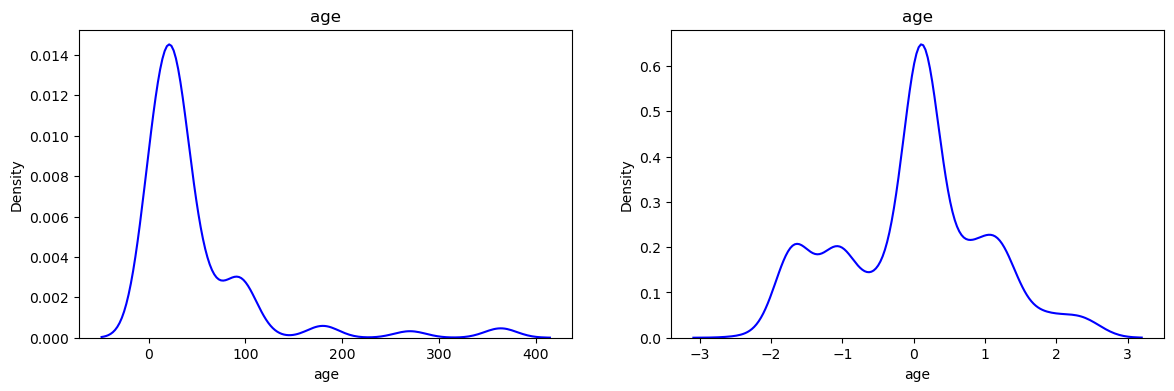

In [16]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col], color='blue')
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(xt_train[col], color='blue')
    plt.title(col)

    plt.show()   


### THANK YOU